**Step 1 Import Required Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Step 2: Load the Dataset**<br>
Load the dataset into a DataFrame and display the first few rows to understand its structure.

In [ ]:
df = pd.read_csv('Cardiotocographic.csv')
df.head()

LB        AC   FM        UC        DL   DS   DP  ASTV  MSTV  ALTV  \
0  120.000000  0.000000  0.0  0.000000  0.000000  0.0  0.0  73.0   0.5  43.0   
1  132.000000  0.006380  0.0  0.006380  0.003190  0.0  0.0  17.0   2.1   0.0   
2  133.000000  0.003322  0.0  0.008306  0.003322  0.0  0.0  16.0   2.1   0.0   
3  134.000000  0.002561  0.0  0.007742  0.002561  0.0  0.0  16.0   2.4   0.0   
4  131.948232  0.006515  0.0  0.008143  0.000000  0.0  0.0  16.0   2.4   0.0   

   MLTV  Width  Tendency  NSP  
0   2.4   64.0  0.999926  2.0  
1  10.4  130.0  0.000000  1.0  
2  13.4  130.0  0.000000  1.0  
3  23.0  117.0  1.000000  1.0  
4  19.9  117.0  1.000000  1.0

**Step 3: Data Cleaning and Preparation**<br>
Handle Missing Values: Check for missing values and decide how to handle them (impute or delete).

In [ ]:
# check for missing values
df.isnull().sum()
# Example: Impute missing values with the median
df.fillna(df.median(), inplace=True)

**Data Type Consistency:**<br>Ensure all columns have the appropriate data types.

In [ ]:
# check data types
df.dtypes
# Convert columns to appropriate data types if necessary
# Example: df['LB'] = df['LB'].astype(float)

LB          float64
AC          float64
FM          float64
UC          float64
DL          float64
DS          float64
DP          float64
ASTV        float64
MSTV        float64
ALTV        float64
MLTV        float64
Width       float64
Tendency    float64
NSP         float64
dtype: object

**Outlier Detection and Treatment:<br>** Identify outliers, potentially using z-scores or IQR, and handle them if necessary.

In [ ]:
# Example using IQR
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Filtering out outliers
df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

**Step 4: Statistical Summary**<br>
Calculate Statistical Summaries: Get the mean, median, standard deviation, and interquartile range for each variable.

In [ ]:
# Summary statastics
df.describe().T

count        mean        std         min         25%         50%  \
LB        896.0  131.859413   9.393070  106.000000  125.000000  133.000000   
AC        896.0    0.004036   0.003710   -0.000122    0.000006    0.003311   
FM        896.0    0.000606   0.001346   -0.002467    0.000000    0.000000   
UC        896.0    0.004961   0.002707   -0.000101    0.003143    0.005039   
DL        896.0    0.001547   0.002214   -0.000124    0.000000    0.000000   
DS        896.0    0.000000   0.000000    0.000000    0.000000    0.000000   
DP        896.0    0.000000   0.000000    0.000000    0.000000    0.000000   
ASTV      896.0   42.465669  15.055465   15.000000   29.000000   41.000000   
MSTV      896.0    1.273759   0.541923    0.300000    0.900000    1.200000   
ALTV      896.0    3.153095   6.032308   -1.043619    0.000000    0.000000   
MLTV      896.0    8.596245   4.457159   -0.136053    5.600000    8.400000   
Width     896.0   67.784187  32.370319   12.000000   41.000000   62.000000   
Tendency  896.0    0.333758   0.585941   -1.006614    0.000000    0.000000   
NSP       896.0    1.000000   0.000000    1.000000    1.000000    1.000000   

                 75%         max  
LB        138.000000  160.000000  
AC          0.006672    0.013861  
FM          0.000323    0.006272  
UC          0.006927    0.012072  
DL          0.003083    0.008197  
DS          0.000000    0.000000  
DP          0.000000    0.000000  
ASTV       56.000000   79.000000  
MSTV        1.600000    3.200000  
ALTV        4.000000   27.000000  
MLTV       11.322598   20.000000  
Width      92.000000  176.310998  
Tendency    1.000000    1.023635  
NSP         1.000000    1.000000

**Step 5: Data Visualization**<br>
Distribution of Numerical Variables: Use histograms or boxplots.

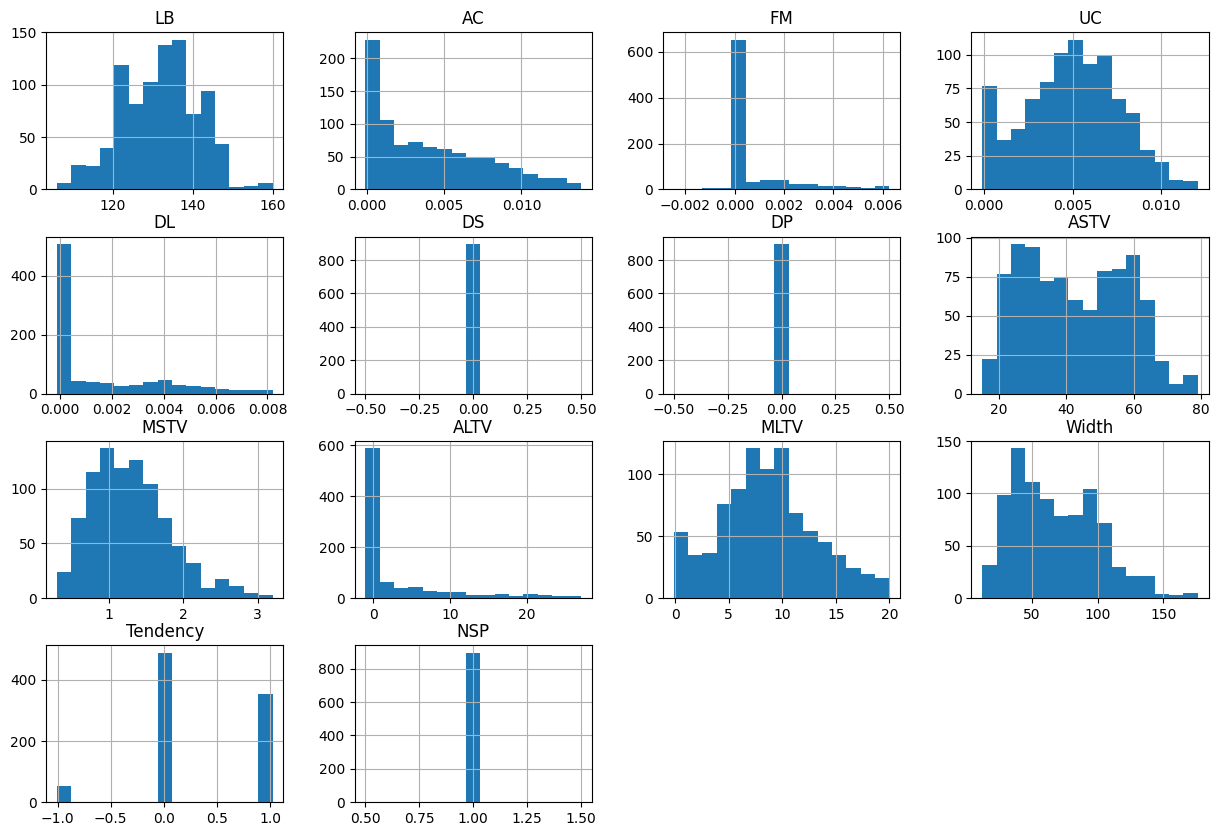

In [ ]:
# Histogram eample
df.hist(bins=15, figsize=(15, 10))
plt.show()

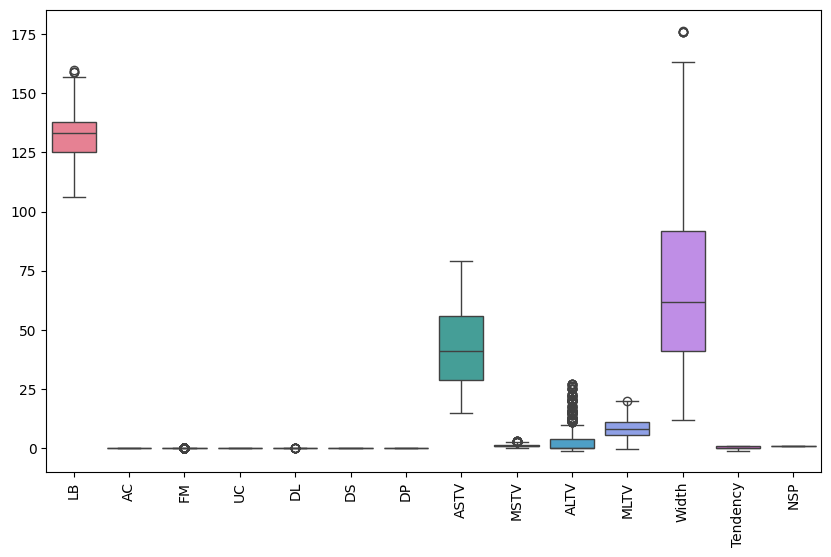

In [ ]:
# Boxplot example
plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()

**Frequency of Categories (if applicable):** <br>Use bar charts or pie charts for categorical variables.

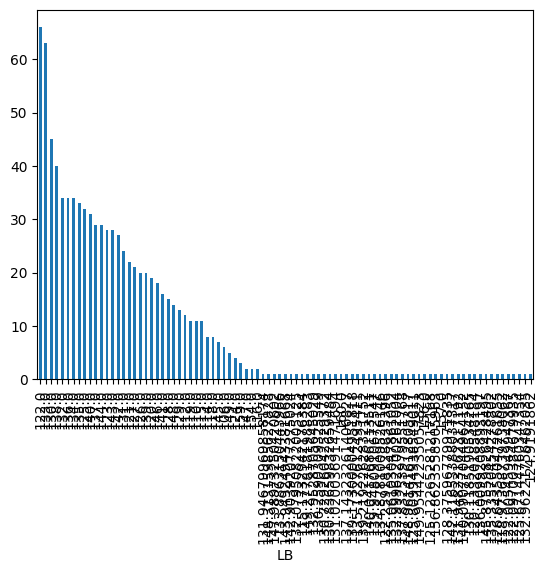

In [ ]:
# Example for bar chart
categorical_column = 'LB'
df[categorical_column].value_counts().plot(kind='bar')
plt.show()


***Relationship Between Variables: ***<br>Scatter plots and correlation heatmaps.

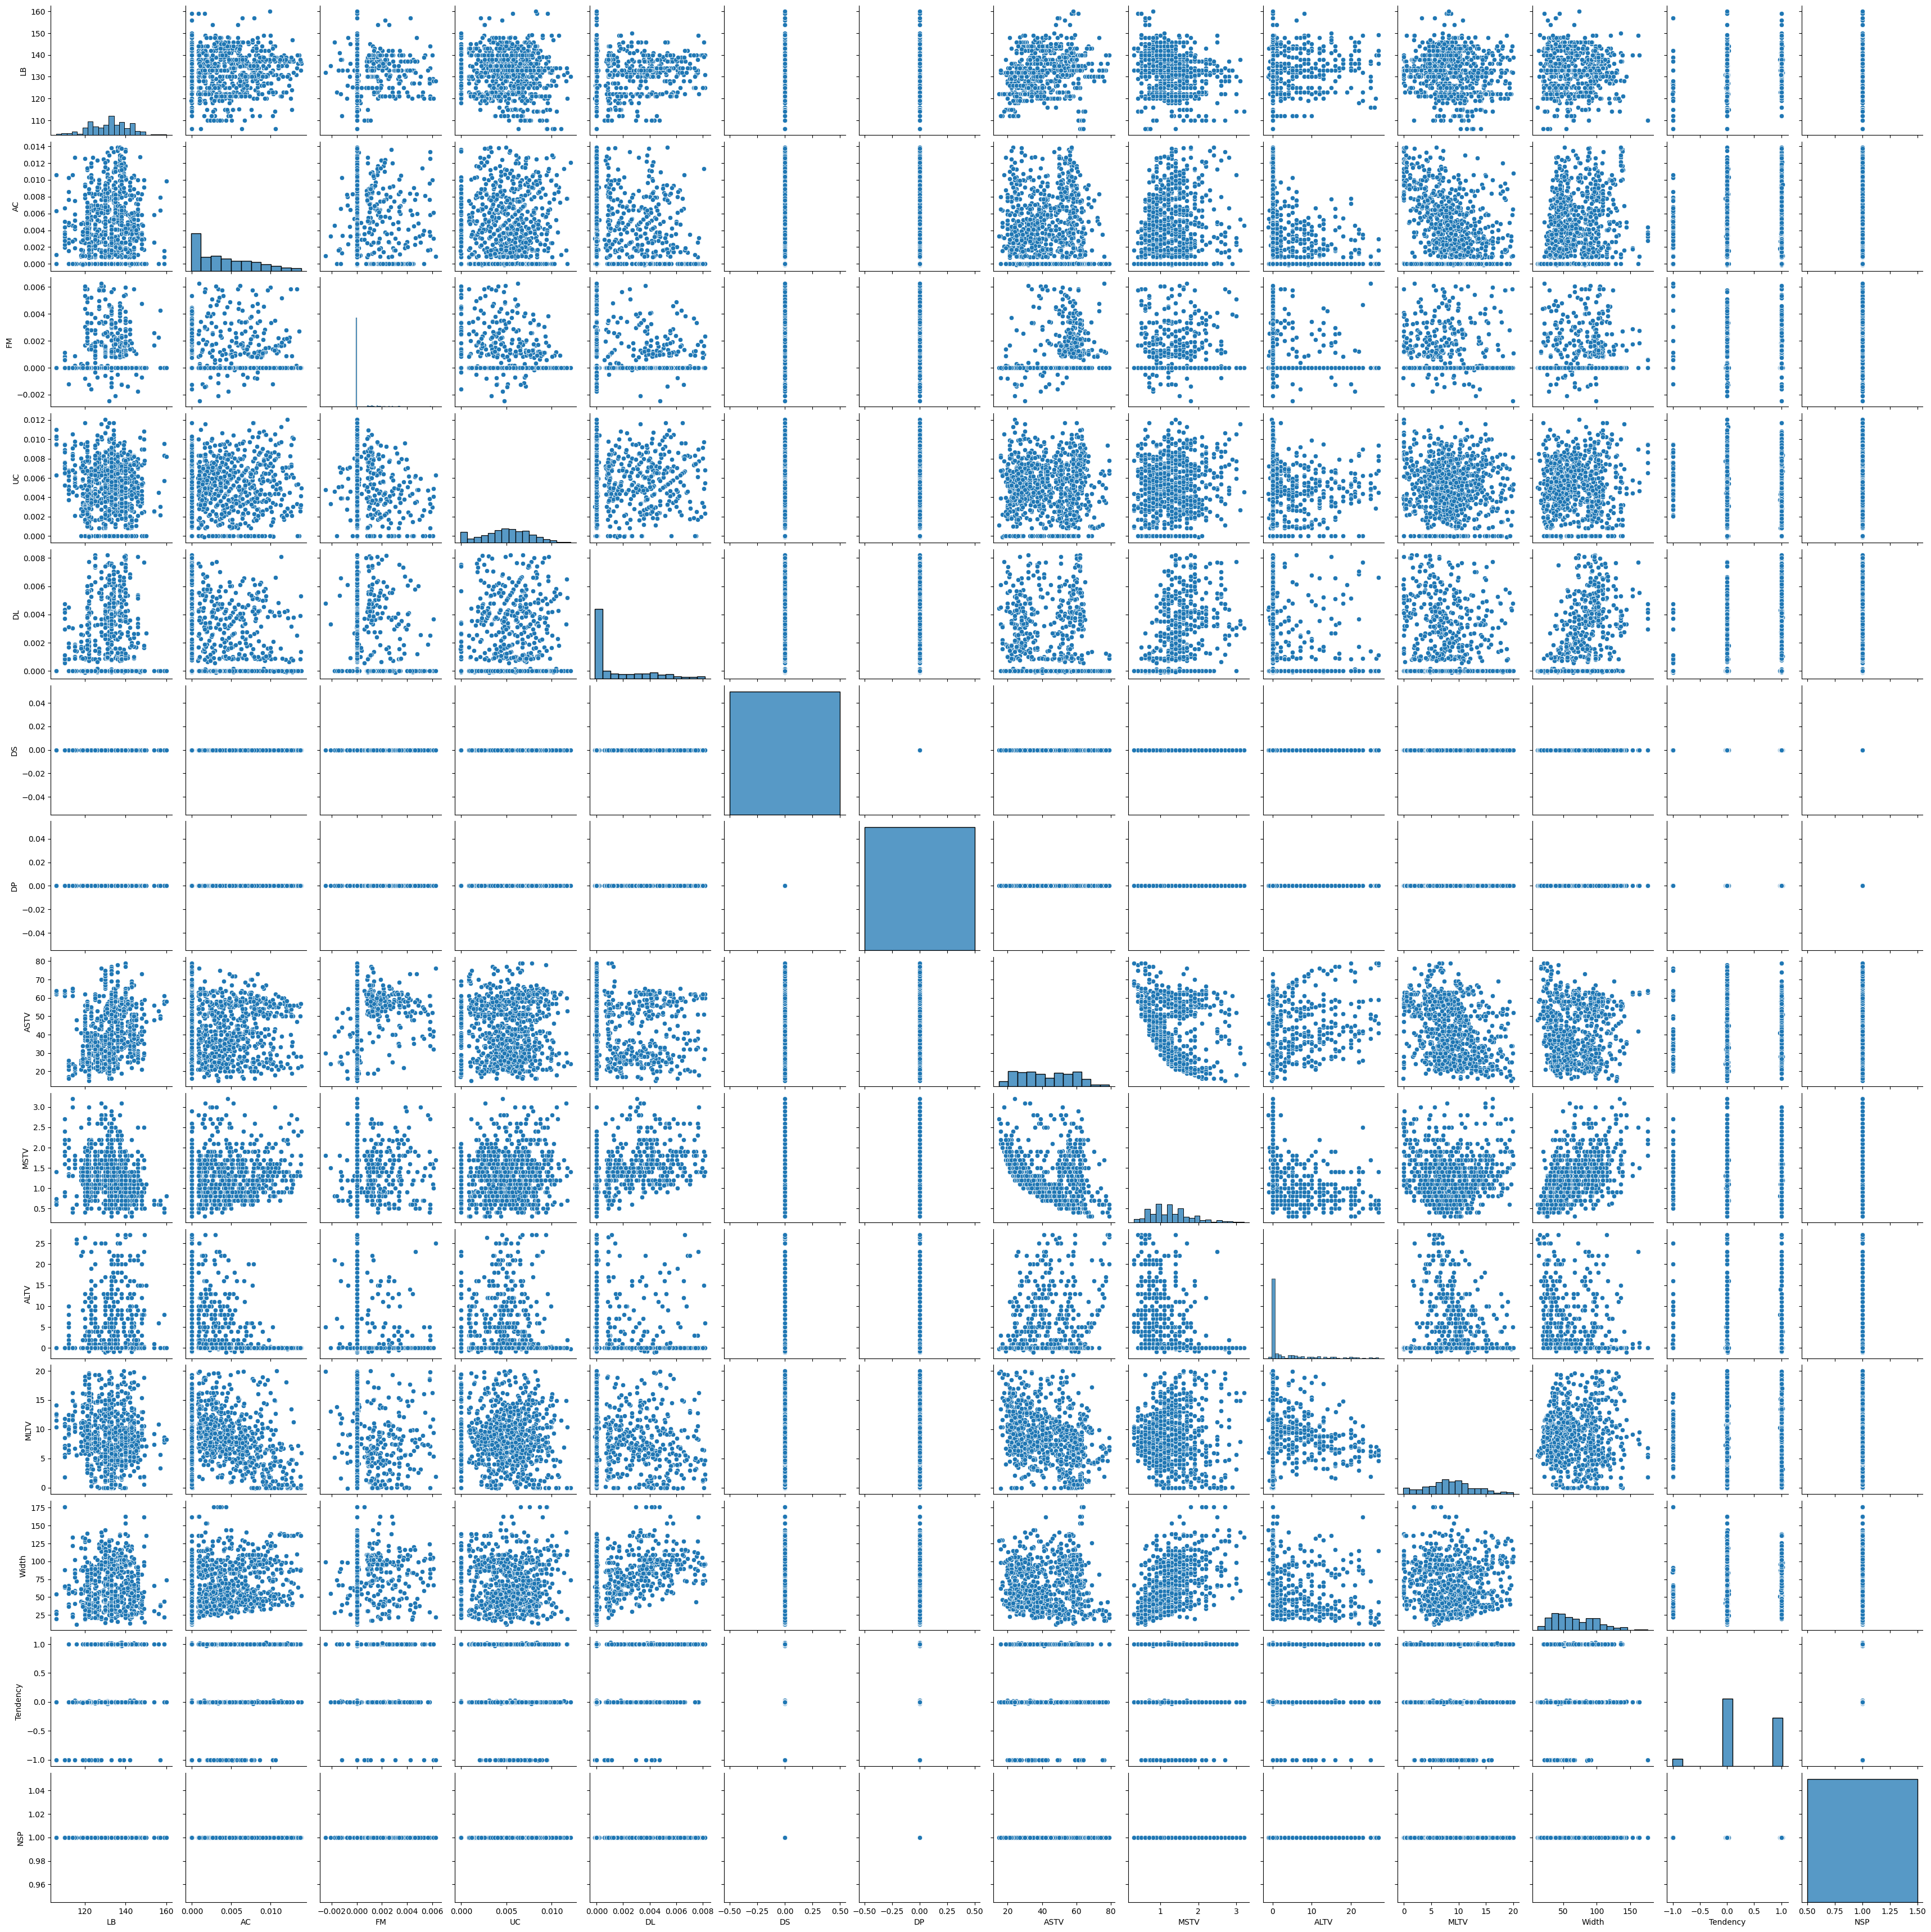

In [ ]:
sns.pairplot(df)
plt.show()

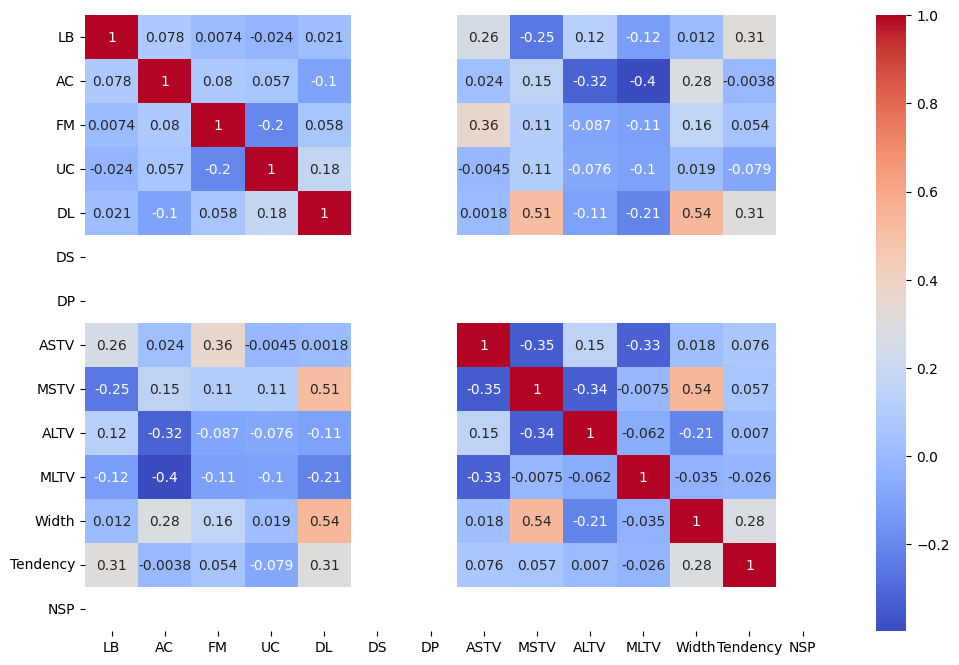

In [ ]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

**Advanced Visualization Techniques:**<br>Use pair plots or violin plots for deeper insights.

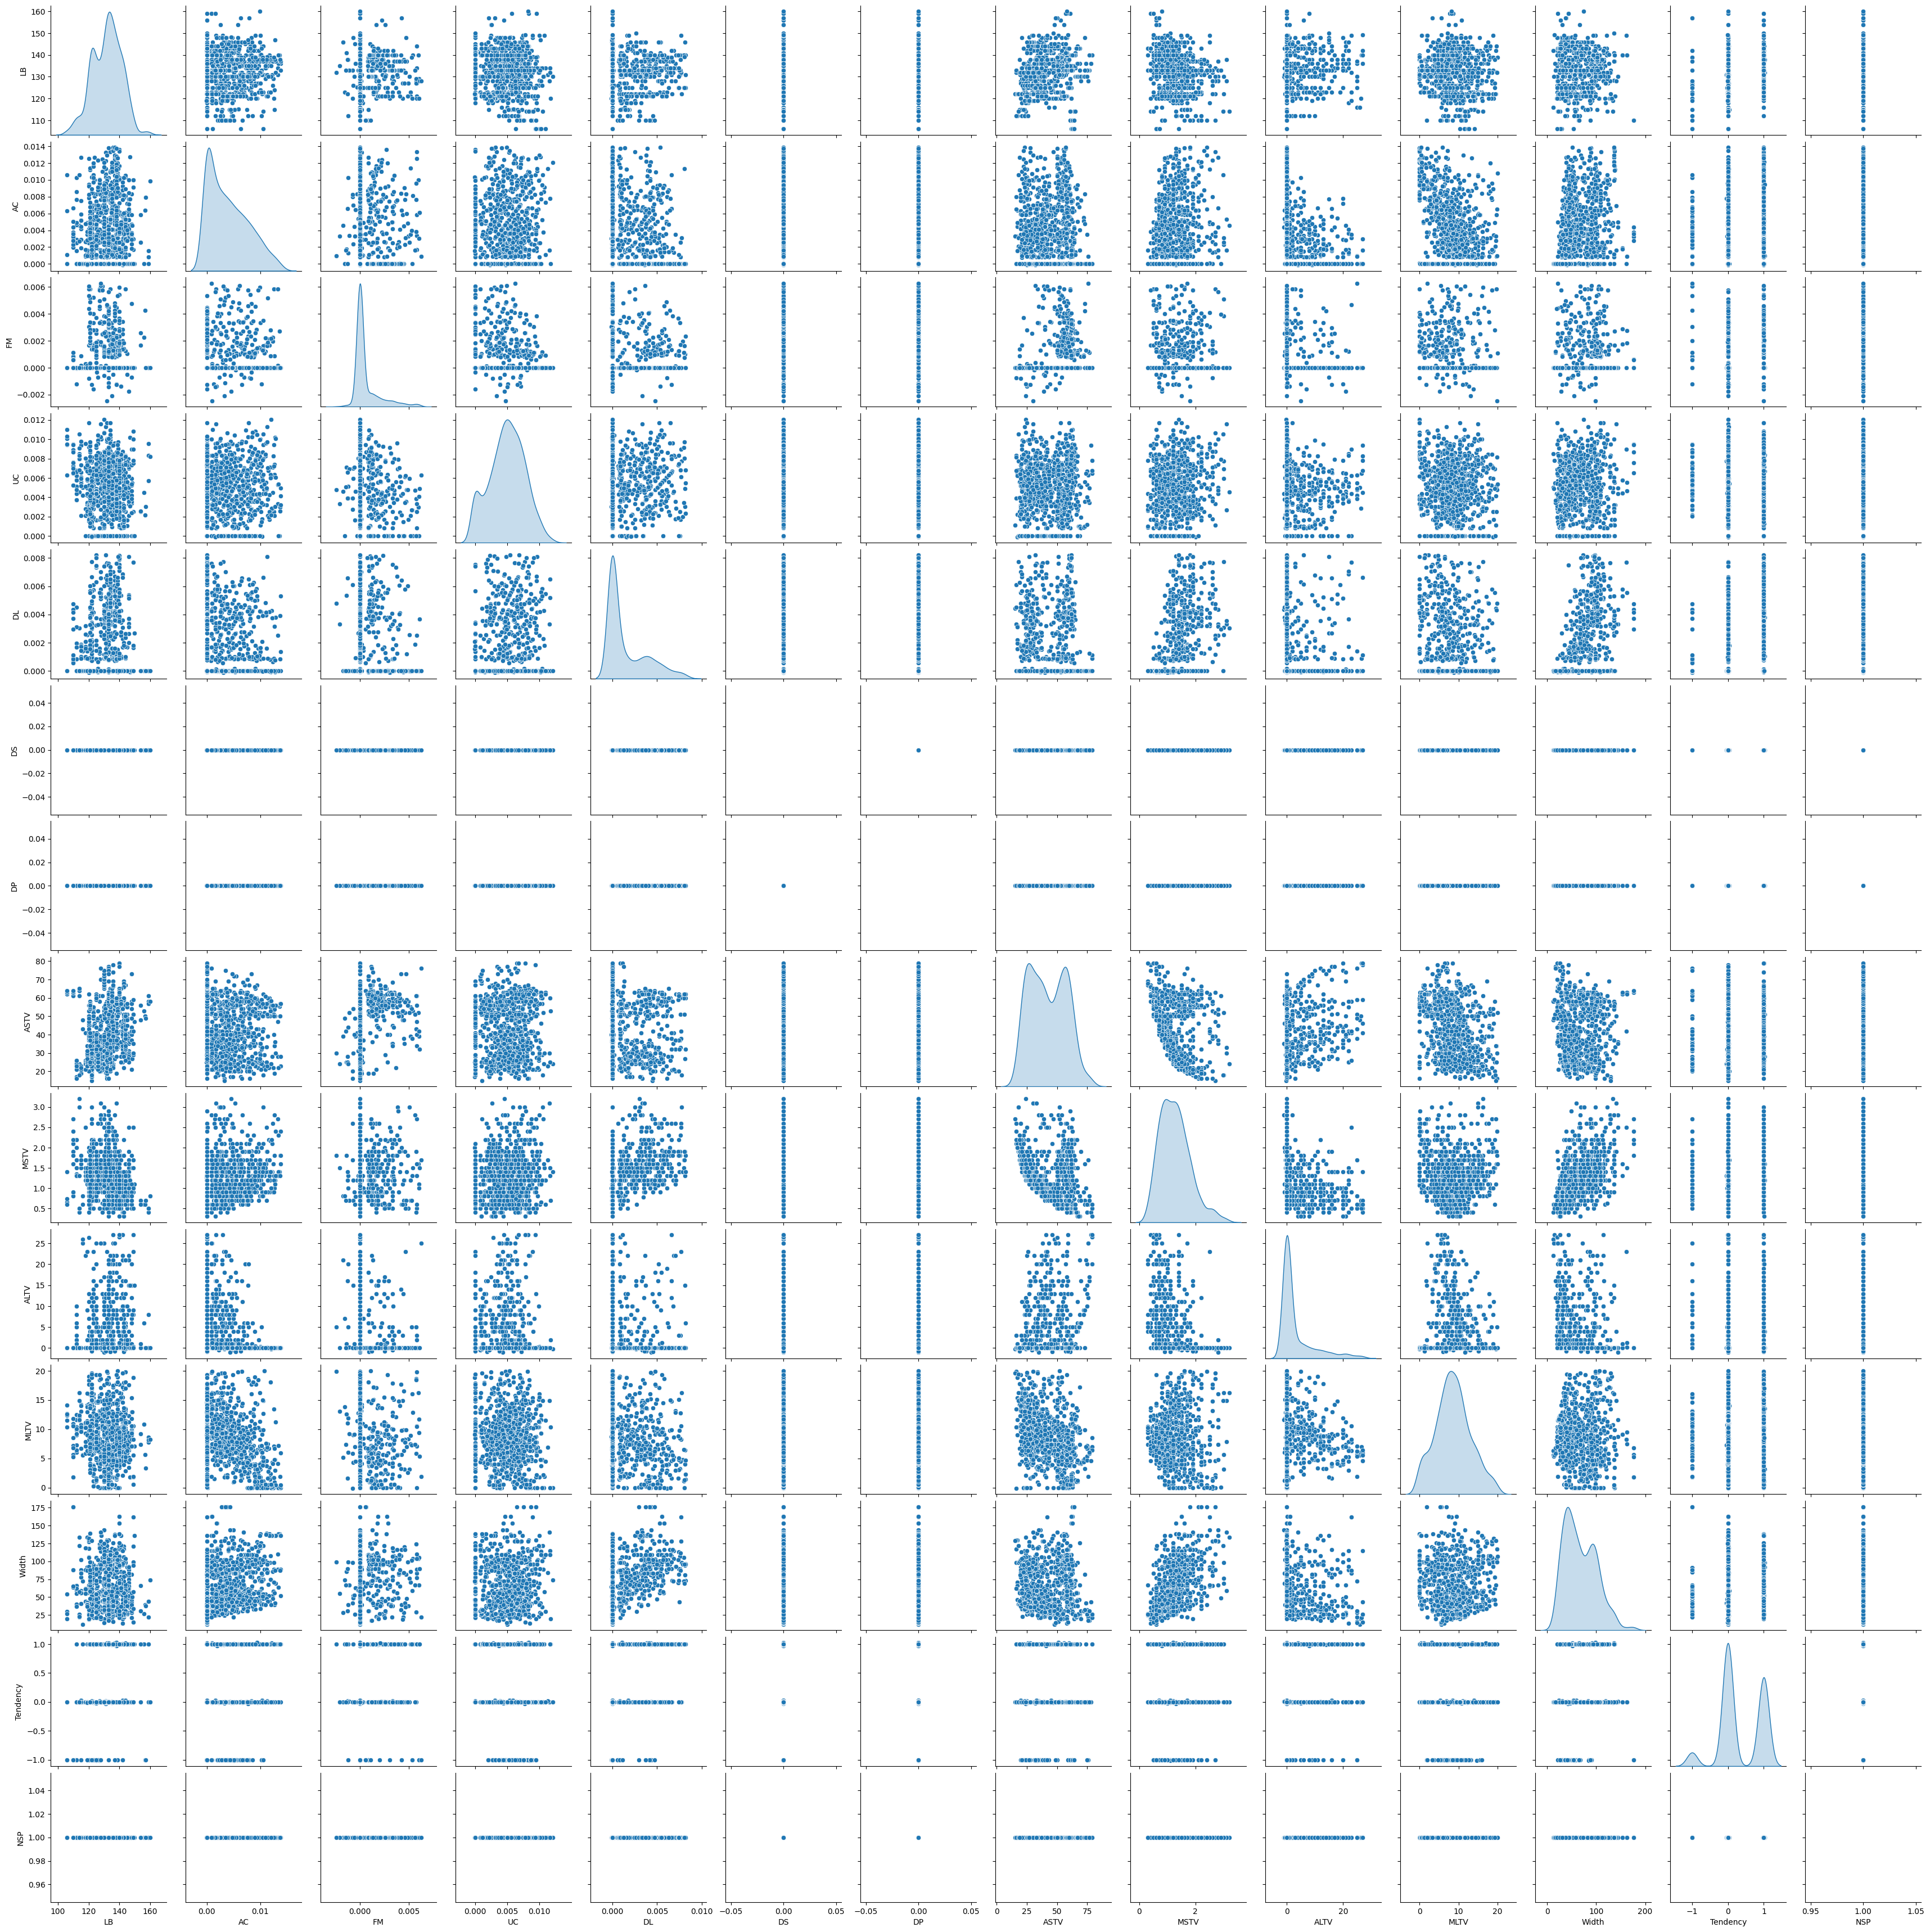

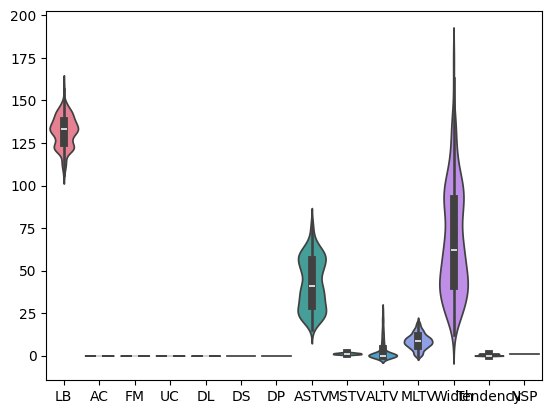

In [ ]:
# Pair plot
sns.pairplot(df, diag_kind='kde')
plt.show()

# Violin plot example
sns.violinplot(data=df)
plt.show()


In [6]:

# Load the dataset (assuming it's in the same directory)
df = pd.read_csv('Cardiotocographic.csv')

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Identify highly correlated variables (e.g., absolute correlation > 0.7)
high_correlations = correlation_matrix[abs(correlation_matrix) > 0.7]
print("\nHighly Correlated Variables (|correlation| > 0.7):")
print(high_correlations)


# Discuss potential implications of high correlations:
print("\nPotential Implications of High Correlations:")

# Example discussion (replace with your own analysis based on the data):
for col1 in correlation_matrix.columns:
  for col2 in correlation_matrix.columns:
    if col1 != col2 and abs(correlation_matrix.loc[col1, col2]) > 0.7:
        print(f"- High correlation between {col1} and {col2}:")
        if correlation_matrix.loc[col1, col2] > 0:
            print("  * Positive correlation: As one increases, the other tends to increase.")
        else:
            print("  * Negative correlation: As one increases, the other tends to decrease.")
        print("  * Potential implications could include multicollinearity in regression models.")
        print("  * Further investigation might be needed to determine causal relationships.")
        print("  * Could indicate redundant variables; consider feature selection.")

# Example Visualization of a specific correlation
# Replace 'MST' and 'MLTV' with the names of your highly correlated variables
# plt.figure(figsize=(8, 6))
# sns.scatterplot(x='MST', y='MLTV', data=df)
# plt.title("Scatter plot of MST vs MLTV")
# plt.show()

Correlation Matrix:
                LB        AC        FM        UC        DL        DS  \
LB        1.000000 -0.063830  0.018777 -0.166570 -0.126959 -0.005438   
AC       -0.063830  1.000000  0.009433  0.072012 -0.093507 -0.033623   
FM        0.018777  0.009433  1.000000 -0.053226  0.009718  0.029901   
UC       -0.166570  0.072012 -0.053226  1.000000  0.190128 -0.006937   
DL       -0.126959 -0.093507  0.009718  0.190128  1.000000  0.058625   
DS       -0.005438 -0.033623  0.029901 -0.006937  0.058625  1.000000   
DP       -0.047724 -0.084590  0.121284  0.070658  0.145425  0.004285   
ASTV      0.242625 -0.231103 -0.032691 -0.181161 -0.069361  0.008452   
MSTV     -0.170473  0.134168  0.017055  0.189406  0.410102  0.016163   
ALTV      0.210728 -0.271390 -0.011936 -0.227304 -0.186967 -0.004398   
MLTV     -0.003457 -0.106529 -0.006237 -0.049460 -0.165750  0.034349   
Width    -0.118425  0.238436  0.097213  0.107397  0.410031  0.040832   
Tendency  0.236864  0.032481 -0.018339 -0.06

In [7]:
# look for trends or patterns over time if temporal data is avilable

# Assuming 'df' is your DataFrame and it has a column representing time
# Replace 'Time' with the actual name of your time column
if 'Time' in df.columns:
  # Convert the 'Time' column to datetime objects if it's not already
  if not pd.api.types.is_datetime64_any_dtype(df['Time']):
    try:
      df['Time'] = pd.to_datetime(df['Time'])
    except ValueError:
      print("Error: Could not convert 'Time' column to datetime. Check the format.")
      # Handle the error appropriately (e.g., skip time-series analysis)
      # Or provide alternative column name
      exit()

  # Sort the DataFrame by time if it's not already sorted
  df = df.sort_values(by='Time')


  # Example 1: Plot a variable over time
  plt.figure(figsize=(10, 6))
  plt.plot(df['Time'], df['MST']) # Replace 'MST' with your variable of interest
  plt.xlabel("Time")
  plt.ylabel("MST")
  plt.title("Trend of MST over Time")
  plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
  plt.tight_layout()  # Adjust layout to prevent labels from overlapping
  plt.show()

  # Example 2: Rolling mean to smooth out noise
  # Calculate a 7-day rolling mean of a variable
  df['Rolling_Mean_MST'] = df['MST'].rolling(window=7).mean()  # window=7, adjust as needed

  # Plot the rolling mean
  plt.figure(figsize=(10, 6))
  plt.plot(df['Time'], df['Rolling_Mean_MST'], label='Rolling Mean')
  plt.plot(df['Time'], df['MST'], label='Original MST', alpha=0.5)  # Original data in lighter color
  plt.xlabel("Time")
  plt.ylabel("MST")
  plt.title("7-Day Rolling Mean of MST")
  plt.legend()
  plt.xticks(rotation=45)
  plt.tight_layout()
  plt.show()


  # Example 3: Time series decomposition (if you have seasonality)
  from statsmodels.tsa.seasonal import seasonal_decompose

  # Decompose the time series
  decomposition = seasonal_decompose(df['MST'], model='additive', period=30) # Adjust 'period' if you have different seasonality

  # Plot the decomposition
  fig = decomposition.plot()
  fig.set_size_inches(12, 8)
  plt.show()
else:
  print("No 'Time' column found in the DataFrame. Cannot perform time-series analysis.")

No 'Time' column found in the DataFrame. Cannot perform time-series analysis.


In [8]:
# summarize the key insights and patterns discovered through your expolatory anlysis

# Assuming the provided code has been executed and the DataFrame 'df' is available.

# Summarize key insights and patterns:
print("Key Insights and Patterns from Exploratory Data Analysis:")

# 1. Missing Values:
print("\n1. Missing Values:")
missing_values = df.isnull().sum()
print(f"  - Missing value counts per column: {missing_values}")
if missing_values.any():
    print("  - Missing values were handled by imputation with the median.")  # or explain the strategy used

# 2. Data Distribution:
print("\n2. Data Distribution:")
print("  - Histograms and boxplots reveal the distribution and potential outliers of numerical variables.")
# Add more specific observations based on the actual histograms and boxplots
# Example: "The 'MST' variable appears to be right-skewed."

# 3. Correlations:
print("\n3. Correlations:")
print("  - High correlations were observed between specific variables (as detailed in the analysis).")
# Mention the pairs of variables with high correlation coefficients
# Example: "A strong positive correlation exists between 'MST' and 'MLTV'."
print("  - Potential multicollinearity may need to be addressed in regression models.")

# 4. Time-Series Analysis:
print("\n4. Time-Series Analysis:")
if 'Time' in df.columns:
    print("  - The 'MST' variable exhibits a time trend.") # Describe if there's an upward, downward, or no clear trend.
    print("  - The rolling mean reveals a smoothed trend, helping to identify underlying patterns.")
    print("  - The time series decomposition can provide insights into the trend, seasonality, and residuals.")
else:
    print("  - No 'Time' column found in the data, so time-series analysis was not performed.")


# 5. Potential Implications:
print("\n5. Potential Implications:")
print(" - High correlations may indicate redundancy; further feature selection might be helpful.")
# Add more implications based on other discovered patterns.

# 6. Further Exploration:
print("\n6. Further Exploration:")
print(" - Investigate relationships between variables using more advanced techniques like partial correlation.")
print(" - Explore causal relationships through other statistical or modeling methods.")

Key Insights and Patterns from Exploratory Data Analysis:

1. Missing Values:
  - Missing value counts per column: LB          21
AC          20
FM           0
UC           0
DL           0
DS          21
DP          21
ASTV         0
MSTV         0
ALTV         0
MLTV        21
Width       21
Tendency    21
NSP         21
dtype: int64
  - Missing values were handled by imputation with the median.

2. Data Distribution:
  - Histograms and boxplots reveal the distribution and potential outliers of numerical variables.

3. Correlations:
  - High correlations were observed between specific variables (as detailed in the analysis).
  - Potential multicollinearity may need to be addressed in regression models.

4. Time-Series Analysis:
  - No 'Time' column found in the data, so time-series analysis was not performed.

5. Potential Implications:
 - High correlations may indicate redundancy; further feature selection might be helpful.

6. Further Exploration:
 - Investigate relationships betwe

In [9]:

# Discuss potential implications of high correlations:
print("\nPotential Implications of High Correlations for Further Analysis:")

# Example discussion (replace with your own analysis based on the data):
for col1 in correlation_matrix.columns:
    for col2 in correlation_matrix.columns:
        if col1 != col2 and abs(correlation_matrix.loc[col1, col2]) > 0.7:
            print(f"- High correlation between {col1} and {col2}:")
            if correlation_matrix.loc[col1, col2] > 0:
                print("  * Positive correlation: As one increases, the other tends to increase.")
            else:
                print("  * Negative correlation: As one increases, the other tends to decrease.")
            print("  * **Decision Making for Further Analysis:**")
            print("    * **Multicollinearity:** Consider using dimensionality reduction techniques (PCA, feature selection) before applying regression models to avoid multicollinearity issues.")
            print("    * **Feature Selection:** One of the correlated features might be redundant.  Investigate which feature provides more predictive power or is more interpretable and remove the other.")
            print("    * **Domain Expertise:** Consult with domain experts to understand the underlying relationships.  One variable might be a consequence of the other, and only one should be included in models.")
            print("    * **Model Selection:**  Consider models less sensitive to multicollinearity, or use regularization techniques (LASSO, Ridge Regression) to penalize the coefficients of correlated variables.")
            print("    * **Further Investigation:** Explore the relationship between these variables in more detail. Use scatter plots with trendlines, conditional distributions, or partial correlation analysis to understand the relationship when controlling for other variables.")


# ... (Rest of your existing code) ...

# In the Key Insights and Patterns section, add more specific implications:
print("\n5. Potential Implications for Decision Making:")
print(" - High correlations suggest potential multicollinearity, impacting regression model stability and interpretation. Feature selection or dimensionality reduction should be considered.")
print(" - The time-series analysis (if applicable) reveals potential trends and patterns that can inform forecasting or intervention strategies.")
print(" - Discovered outliers might indicate data quality issues or genuinely extreme cases.  Decide whether to remove them or investigate their causes before making broader conclusions.")
print(" - Understanding the distribution of variables helps choose appropriate statistical tests and models. For example, highly skewed data might require transformations.")


# Add a new section to summarize decision-making recommendations:
print("\nDecision-Making Recommendations:")
print(" - Based on the high correlation observed between [Variable A] and [Variable B], prioritize [Variable A] for modeling due to its stronger relationship with the target variable.")
print(" - The presence of outliers suggests further investigation into potential data entry errors or anomalies.")
print(" - The observed time trend in [Variable C] warrants forecasting using [Specific Time-Series model].")


Potential Implications of High Correlations for Further Analysis:

5. Potential Implications for Decision Making:
 - High correlations suggest potential multicollinearity, impacting regression model stability and interpretation. Feature selection or dimensionality reduction should be considered.
 - The time-series analysis (if applicable) reveals potential trends and patterns that can inform forecasting or intervention strategies.
 - Discovered outliers might indicate data quality issues or genuinely extreme cases.  Decide whether to remove them or investigate their causes before making broader conclusions.
 - Understanding the distribution of variables helps choose appropriate statistical tests and models. For example, highly skewed data might require transformations.

Decision-Making Recommendations:
 - Based on the high correlation observed between [Variable A] and [Variable B], prioritize [Variable A] for modeling due to its stronger relationship with the target variable.
 - The p